# Лабораторная работа №2.
## Численное решение СЛАУ.
Написать программу для численного решения СЛАУ произвольного порядка. Предусмотреть возможность проверки совместности системы, достаточных условий применимости используемых методов, оценки чис- ла обусловленности.
1. РеализоватьметодпрогонкидлятрехдиагональнойматрицыСЛАУ.
2. РеализоватьметодыЯкобииЗейделяитерационногорешенияСЛАУ.
3. Реализовать методы наискорейшего спуска и наименьшей невязки.

## Метод Гаусса

In [1]:
import numpy
import matplotlib.pyplot as plt


In [2]:
"""
A = numpy.array([[1.,3.,0.,0.],
                 [6.,3.,1,0. ],
                 [0.,6.,2.,4.],
                 [0.,0.,2.,1.]])
B = numpy.array([5.,6.,5.,9.])
"""
n = 3
A = numpy.random.rand(n,n) + n * numpy.eye(n)
B = numpy.random.rand(n)
print("its Numpy:", numpy.linalg.solve(A,B))


def gauss(A, B):
    row = []
    for i in range(len(A)):
        row.append(i)
    
    def DivideRow(A, B, row, divider): # функция деления row на divider
        A[row] /= divider
        B[row] /= divider
    
    def CombineRows(A, B, row, source_row, weight): # вычитание строки с другой умноженную на константу
        A[row] = A[row] - weight*A[source_row]
        B[row] = B[row] - weight*B[source_row]
    
    for col in range(len(A)):
        row1 = [i for i in row]
        row1.remove(col)
        DivideRow(A, B, col, A[col][col])
        for i in row1:
            CombineRows(A,B, i,col,A[i][col])
    return B

print("its my gauss:", gauss(A, B))


its Numpy: [0.28614448 0.0486269  0.0367565 ]
its my gauss: [0.28614448 0.0486269  0.0367565 ]


In [4]:
#f = open("gauss.txt", "rt")
#d = list(f.readlines()[0])
#print(d)
#A = numpy.array(d)


In [5]:

#data = np.loadtxt("gauss.txt", delimiter='\t', dtype=np.float)

# Метод Гаусса-Жордана 


In [6]:
"""A = numpy.array([[1.,3.,0.,0.],
                 [6.,3.,1,0. ],
                 [0.,6.,2.,4.],
                 [0.,0.,2.,1.]])
B = numpy.array([5.,6.,5.,9.])"""

n = 3
A = numpy.random.rand(n,n) + n * numpy.eye(n)
B = numpy.random.rand(n)
A_1 = A
B_1 = B

def DivideRow(A, B, row, divider): # функция деления row на divider
    A[row] /= divider
    B[row] /= divider
    
def CombineRows(A, B, row, source_row, weight): # вычитание строки с другой умноженную на константу
    A[row] = A[row] - weight*A[source_row]
    B[row] = B[row] - weight*B[source_row]

def SwapRows(A, B, place_max, col):
    y = [i for i in A[col]]
    A[col]= A[place_max[0]]
    A[place_max[0]] = y
    y1 = B[col]
    B[col] = B[place_max[0]]
    B[place_max[0]] = y1
    
def forward_stroke(A,B):
    for col in range(len(A)):
        max = abs(A[0][0])
        place_max = [0,0]
        
        for i in range(len(A)):         # Поиск  
            if abs(A[i][0]) >= max:     #       максимального
                place_max = [i, 0]      #                     значения
                max = A[i][0]           #                              в столбце
        SwapRows(A, B, place_max, col=0) # Ставим максимальное значение в углу
        DivideRow(A, B,0, A[0][0])       # И делим на него
        for i in range(1,len(A)):
                CombineRows(A,B, i,0,A[i][0])  # Вычитаем из всех остальных строк линейную комбинацию первой
        if col==0:
            A_SAVE = numpy.zeros((len(A),len(A))) # сохраняем получившуюся первую строку нашей матрицы A
            B_SAVE = numpy.zeros(len(A))          # сохраняем первой значение матрицы B    
        a = np.concatenate([col*[0],A[0]])
        A_SAVE[col]=a
        B_SAVE[col]=B[0]
        if len(A)==1:                          # Если матрица A станет размером 1x1 выходим из цикла
            break

        B = B[1:]                              # берем подматрицу
        A = A[1:]
        B1 = []                                   # то есть вычитаем из матрицы A первый столбец 
        for i in range(len(A)):                   # и первую строчку(итерируемся так 
            B2=np.delete(A[i], [0])               # пока не дойдем до размера A 1x1)
            B1.append(B2)

        b2 = numpy.zeros((len(B1),len(B1)))
        for i in range(len(B1)):
            b2[i]=B1[i]
        A = b2

    return A_SAVE, B_SAVE

def reverse_stroke(A,B): # обратный ход для треугольной матрицы 
    for i in range(len(A)-1,-1,-1):
        row1 = [j for j in range(i)]
        for k in row1:
            CombineRows(A,B,k,i, A[k][i])
    return A, B    

def Gauss_Jordan(A, B):
    A,B=forward_stroke(A,B)
    A,B=reverse_stroke(A,B)
    return A,B

print("its Numpy:", numpy.linalg.solve(A_1,B_1))
print("its Gauss_Jordan:", Gauss_Jordan(A, B)[1])



its Numpy: [0.06071199 0.0447929  0.01107161]
its Gauss_Jordan: [0.06071199 0.0447929  0.01107161]


# Теорема Кронекера-Капелли

Система линейных алгебраических уравнений совместна тогда и только тогда, когда ранг матрицы системы равен рангу расширенной матрицы системы, т.е. rang A = rang A*.

In [7]:
import numpy
def Compatibility(A,B):
    rgA = numpy.linalg.matrix_rank(A)
    A_up = np.column_stack((A, B))
    rgA_up = numpy.linalg.matrix_rank(A_up)
    if rgA == rgA_up:
        print("The system of linear algebraic equations is compatible")
        
    else:
        print("The system of linear algebraic equations is NOT compatible")
        

# Метод прогонки 

In [9]:
A = numpy.array([[1.,3.,0.,0.],
                 [6.,3.,1,0. ],
                 [0.,6.,2.,4.],
                 [0.,0.,2.,1.]])
B = numpy.array([5.,6.,5.,9.])
Compatibility(A,B)
print("Conditioning numbers" ,numpy.linalg.cond(A, p=2))
p = []
q = []
def run_through(A,B):
    for i in range(len(A)-1):
        if i==0:
            p.append(-A[0][1]/A[0][0])                                    #Поиск
            q.append(B[0]/A[0][0])                                        #Прогоночных
        else:                                                             #Коэффициентов
            q.append((B[i]-A[i][i-1]*q[-1])/(A[i][i-1]*p[-1]+A[i][i]))
            p.append(-(A[i][i+1]/(A[i][i-1]*p[-1]+A[i][i])))
    X = np.zeros(len(A))
    for i in range(1,len(A)+1):                                            #Обратный 
        if i==1:                                                              #ход                  
            X[-i] = (B[-1]-A[-1][-2]*q[-1])/(p[-1]*A[-1][-2]+A[-1][-1])
        else:
            X[-i] = X[-i+1]*p[-i+1] + q[-i+1]
    return X
print("Its run_through algorithm: ", run_through(A,B) )
print("its Numpy:                 ", numpy.linalg.solve(A,B))

The system of linear algebraic equations is compatible
Conditioning numbers 12.372686359376686
Its run_through algorithm:  [-1.25        2.08333333  7.25       -5.5       ]
its Numpy:                  [-1.25        2.08333333  7.25       -5.5       ]


# Метод Якоби
\begin{cases}
    a_{11}x_{1}+a_{12}x_{2}+...+a_{1n}x_{n}=f1 \\
    ... \\
    a_{n1}x_{1}+a_{n2}x_{2}+...+a_{nn}x_{n}=fn
 \end{cases}
 
$$ \Rightarrow 
\begin{cases}
    x_{1}^{(1)} = \frac{1}{a_{11}}(f_{1} - \sum\limits_{j=2}^n a_{1j} x_{j}^{(0)}) \\
    x_{2}^{(1)} = \frac{1}{a_{22}}(f_{2} - \sum\limits_{j=3}^n a_{2j} x_{j}^{(0)} - a_{21} x_{1}^{(0)}) \\
    ...
 \end{cases}
$$

$$
x_{i}^{(k+1)} = \frac{1}{a_{ii}}(f_{k+1} - \sum\limits_{j \neq i }^n a_{ij} x_{j}^{(k)})
$$

Достаточное условие применение данного метода:
$$ \sum_{i=1, i\neq j}^n |a_{ij}| < |a_{ii}| , \newline i=1,...,n$$

In [10]:
# Достаточное условие применения метода Якоби
def suff_condition(A): # диагонального преобладания в исходной матрице A
    check = 0 
    for i in range(len(A)):
        a_s = np.sum(abs(A[i]))-abs(A[i][i])
        if a_s < abs(A[i][i]):
            check = check +1
            
    if check == len(A):
        #print("You can safely use the Jacobi method.")
        return 1
    else:
        #print("Does not meet sufficient conditions of the Jacobi method. Try to transform the input matrix A.")
        return 0

The system of linear algebraic equations is compatible
Conditioning numbers 1.6667944360436333
You can safely use the Jacobi method.


its Numpy:  [0.00385018 0.09662323 0.11610643 0.09880509 0.07265581]
its Jacobi: [0.00384349 0.09661967 0.11609918 0.09879773 0.07264822]


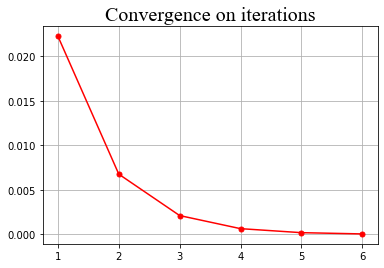

In [55]:
n = 5
A = numpy.random.rand(n,n) + n * numpy.eye(n)
B = numpy.random.rand(n)
A_1 = A
B_1 = B
epsilon = 0.0001 
norma = numpy.array([])
"""
A = numpy.array([[115.,-20.,-75.],
                 [15.,-50.,-5],
                 [6.,2.,20.]])
B = numpy.array([20.,-40.,28.])
"""

######################################################################################################

def Jacobi(A, B, k, norma):
    for i in range(len(A)):
        B[i] = B[i]/A[i][i]
        A[i] = A[i]/A[i][i]
    A = A*(-1)
    for i in range(len(A)):
        A[i][i]=1

    X = np.zeros(len(A))
    X1 = np.zeros(len(A))
    X = A.dot(B)
    
    i = 0
    while i >= 0:
            X1 = A.dot(X)
            for j in range(len(A)):
                X1[j]=X1[j]-X[j]+B[j]
                
            norma = numpy.append(norma, numpy.linalg.norm(X - X1))
            if norma[-1] < epsilon:
                break
                
            X=X1
            #print("\nНомер итерации -", i+1)
            #print("its my jacobi:", X1)  
            i += 1
    return X1,norma

######################################################################################################

Compatibility(A,B)
print("Conditioning numbers" ,numpy.linalg.cond(A, p=2))
if suff_condition(A):
    print("You can safely use the Jacobi method.")
    X1, norma = Jacobi(A, B, k, norma)     
else:
    print("Does not meet sufficient conditions of the Jacobi method. Try to transform the input matrix A.")  
print("\n")
   

print("its Numpy: ", numpy.linalg.solve(A_1,B_1))
print("its Jacobi:", X1)
plt.title('Сonvergence on iterations', fontsize=20, fontname='Times New Roman')
plt.plot(np.arange(1, norma.shape[0]+1), norma, marker = '.',markersize = 10, color = 'red')
plt.grid()
plt.show()

# Метод Зейделя
Тоже самое, что и в методе Якоби, но
\begin{cases}
    a_{11}x_{1}+a_{12}x_{2}+...+a_{1n}x_{n}=f1 \\
    ... \\
    a_{n1}x_{1}+a_{n2}x_{2}+...+a_{nn}x_{n}=fn
 \end{cases}
 
$$ \Rightarrow 
\begin{cases}
    x_{1}^{(1)} = \frac{1}{a_{11}}(f_{1} - \sum\limits_{j=2}^n a_{1j} x_{j}^{(0)}) \\
    x_{2}^{(1)} = \frac{1}{a_{22}}(f_{2} - \sum\limits_{j=3}^n a_{2j} x_{j}^{(0)} - a_{21} {\color{red}{x_{1}^{(1)}}}) \\
    ...
 \end{cases}
$$
$$
x_{i}^{(k+1)} = \frac{1}{a_{ii}}(f_{k+1} - \sum\limits_{j=1 }^{i-1} a_{ij} x_{j}^{(k+1)}- \sum\limits_{j=i }^{n} a_{ij} x_{j}^{(k)})
$$



The system of linear algebraic equations is compatible
Conditioning numbers 1.8047149737029726
You can safely use the Zeidel method.


its Numpy : [0.13108773 0.02185443 0.14523293]
its Zeidel: [0.13108781 0.02185205 0.14524164]


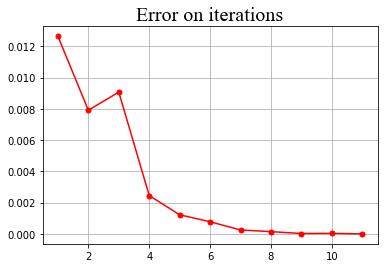

In [67]:
"""
A = numpy.array([[100.,30.,-70.],
                 [15.,-50.,-5],
                 [6.,2.,20.]])
B = numpy.array([60.,-40.,28.])
"""
n = 3
A = numpy.random.rand(n,n) + n * numpy.eye(n)
B = numpy.random.rand(n)
A_1 = A
B_1 = B
x_ex = numpy.linalg.solve(A_1, B_1)
norma = numpy.array([])
epsilon = 0.00001 

######################################################################################################
def Zeidel(A, B, k, norma):
    for i in range(len(A)):
        B[i] = B[i]/A[i][i]
        A[i] = A[i]/A[i][i]
    A = A*(-1)
    for i in range(len(A)):
        A[i][i]=1
    X = np.zeros(len(A))
    X1 = np.zeros(len(A))

    for i in range(len(A)):
        X1[i] = A.dot(B)[i]
        X[i] = X1[i]
    
    i = 0
    while i >= 0:
        check = 0
        for j in range(len(A)):
            X1[j] = A.dot(X)[j] - X[j] + B[j]
            norma = numpy.append(norma, numpy.linalg.norm(X - X1))
            if norma[-1] < epsilon:
                check += 1
                break
            X[j] = X1[j]
        if check:
            break
        i += 1
    
    return X, norma

######################################################################################################

Compatibility(A,B)
print("Conditioning numbers" ,numpy.linalg.cond(A, p=2))
if suff_condition(A):
    print("You can safely use the Zeidel method.")
    X1, norma = Zeidel(A, B, k, norma)
else : 
    print("Does not meet sufficient conditions of the Zeidel method. Try to transform the input matrix A.")   
print("\n")

print("its Numpy :", numpy.linalg.solve(A_1,B_1))
print("its Zeidel:", X1)
plt.title('Error on iterations', fontsize=20, fontname='Times New Roman')
plt.plot(np.arange(1, norma.shape[0] + 1), norma, marker = '.',markersize = 10, color = 'red')
plt.grid()
plt.show()


# Градиентный спуск

In [463]:
def grad_descent(f, df, low=None, high=None): #возвращает значение x минимума

    def find_local_min(f, df, low_local, high_local, iters=5000, lr=0.05):
        #функция для нахождения минимума функции f на промежутке (low_local, high_local)
        x0 = np.random.uniform(low_local, high_local)
        x = x0
        for i in range(iters):
            if i == 0:
                x = x - lr * df(x)
            else: 
                x = x - lr * (pow(i,-0.5)) * df(x)
            x = np.clip(x, low_local ,high_local) # чтобы наш x не вышел за границу
        return x
    
    d = 6
    temp = (high - low)/d #разбиваем наш отрезок на d частей 
    dx = temp
    dy = 0
    result = np.array([])
    
    for k in range(d): #проходимся по каждому отрезку в поисках минимума
        result = np.append(result,find_local_min(f, df, low+dy, low + dx, iters=500, lr=0.05))
        dx = dx + temp
        dy = dy + temp
    
    result_f = f(result)
    best_estimate_index = np.argmin(result_f) # из всех минимумов выбираем самый маленький 
    best_estimate = result[best_estimate_index] # и тем самы находим x min 
    return best_estimate

f = lambda x: (x-1)**2 + np.sin(x)
df = lambda x: 2*(x-1) + np.cos(x)
print("min_x: ", grad_descent(f, df, low = -1, high =1))



min_x:  0.5833202769389757


# Градиентный спуск №2
$$F(x) = \frac{1}{2}<Ax,x> - <b,x> + const \newline
  \nabla F(x_k) = Ax_{k} - b = r_{k} \newline
  x_{k+1} = x_{k} - \tau_{k}(Ax_{k} - b) \newline
  \tau_{k} = \frac{<r_{k}, r_{k}>}{<Ar_{k}, r_{k}>}
$$

Gradient descent: [ 0.06774117  0.09585737  0.08949729  0.00687685 -0.00211685]
Numpy:            [ 0.06773424  0.09583216  0.0895103   0.00685425 -0.00212557]


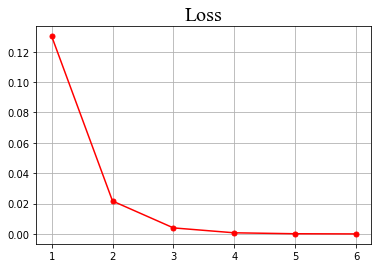

In [88]:
n = 5
A = numpy.random.rand(n,n) + n * numpy.eye(n)
B = numpy.random.rand(n)
X = numpy.array([])
norma = numpy.array([])
epsilon = 1e-4

def Gradient_descent(A, B, step, norma):
    r = A.dot(B) - B
    tau = np.dot(r,r) / (np.dot(A.dot(r),r))
    X = B - tau*r
    
    i = 0
    while i >= 0:
        r = A.dot(X) - B
        tau = np.dot(r,r) / (np.dot(A.dot(r),r))
        X1 = X - tau*r
        norma = numpy.append(norma, numpy.linalg.norm(X - X1))
        if norma[-1] < epsilon:
            break
        X = X1
        i += 1
    return X, norma
        
X, norma = Gradient_descent(A, B, step, norma)
print("Gradient descent:", X)  
print("Numpy:           ", np.linalg.solve(A,B))
plt.title('Loss', fontsize=20, fontname='Times New Roman')
plt.plot(np.arange(1, norma.shape[0] + 1), norma, marker = '.',markersize = 10, color = 'red')
plt.grid()
plt.show()

# Метод минимальных невязок
$$F(x) = ||Ax-b||_{2}$$
$$
\nabla F(x_k) = Ax_{k} - b = r_{k} \newline
  x_{k+1} = x_{k} - \tau_{k}(Ax_{k} - b) \newline
  \tau_{k} = \frac{<Ar_{k}, r_{k}>}{<Ar_{k}, Ar_{k}>}
$$

Gradient descent: [ 0.04402962 -0.01411237  0.14062524  0.14696409  0.06027945]
Numpy:            [ 0.04403731 -0.01418735  0.14066937  0.14697358  0.06022504]


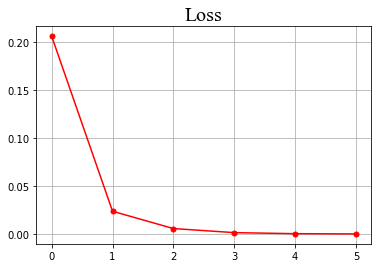

In [87]:
n = 5
A = numpy.random.rand(n,n) + n * numpy.eye(n)
B = numpy.random.rand(n)
X = numpy.array([])
x_ex = numpy.linalg.solve(A, B)
norma = numpy.array([])
epsilon = 1e-4

def Minimum_residuals(A, B, step, norma):
    r = A.dot(B) - B
    tau = np.dot(r,r) / (np.dot(A.dot(r),r))
    X = B - tau*r
    
    i = 0
    while i >= 0:
        r = A.dot(X) - B
        tau = np.dot(A.dot(r),r) / (np.dot(A.dot(r),A.dot(r)))
        X1 = X - tau*r
        norma = numpy.append(norma, numpy.linalg.norm(X - X1))
        if norma[-1] < epsilon:
            break
        X = X1
        i += 1
    return X, norma

X, norma = Minimum_residuals(A, B, step, norma)
print("Gradient descent:", X)  
print("Numpy:           ", np.linalg.solve(A,B))
plt.title('Loss', fontsize=20, fontname='Times New Roman')
plt.plot(np.arange(0, norma.shape[-1], 1), norma, marker = '.',markersize = 10, color = 'red')
plt.grid()
plt.show()